# 확률 - 표본 분포

In [1]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 1. 표본평균의 표본분포 
- 표본분포 : 모집단에서 일정한 크기의 모든 가능한 표본을 추출하였을 때 그 모든 표본으로부터 계산된 통계량의 확률분포

In [2]:
# 데이터 생성 
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)

In [4]:
s_df.head()

,0
0,-5.000000
1,-4.894895
2,-4.789790
3,-4.684685
4,-4.579580


In [6]:
# 차원 정리 
s_df_sqz = s_df.squeeze('columns')

In [8]:
# s_df_sqz

In [20]:
### 각 샘플수에 따른 1000개 평균 계산  
sample_data = pd.DataFrame({
    'dist': s_df_sqz.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'dist': [s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type': '5개샘플평균',
})

sample_mean_10 = pd.DataFrame({
    'dist': [s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type': '10개샘플평균',
})

sample_mean_20 = pd.DataFrame({
    'dist': [s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type': '20개샘플평균',
})

sample_mean_30 = pd.DataFrame({
    'dist': [s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type': '30개샘플평균',
})

results = pd.concat([sample_data, sample_mean_05,sample_mean_10, sample_mean_20, sample_mean_30])

In [21]:
results.shape

(5000, 2)

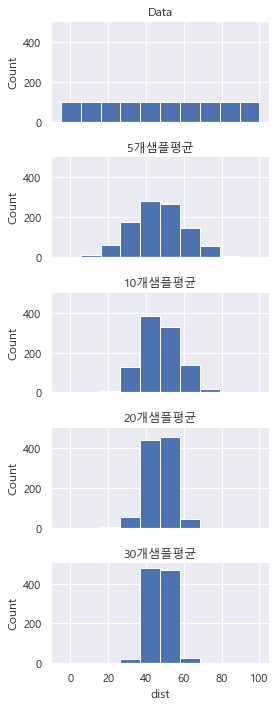

In [22]:
# 샘플 수에 따른 표본평균의 시각화 
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


## 2. 중심극한정리 

### 1)  정규분포 
- 평균을 중심으로 좌우대칭이고 종모양을 갖는 확률분포(=가우스 분포, Gaussian distribution)
####  stats.norm(loc = '기대값', scale = '표준편차)  

In [34]:
## 기댓값이 50이고 표준 편차가 10인 정규분포 
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
norm = stats.norm(loc=50, scale=10)

## -10 ~ 120 까지 2000개 생성 
s_x = np.linspace(-10, 120, 2000)
## 확률 밀도함수 
s_pdf = norm.pdf(s_x)

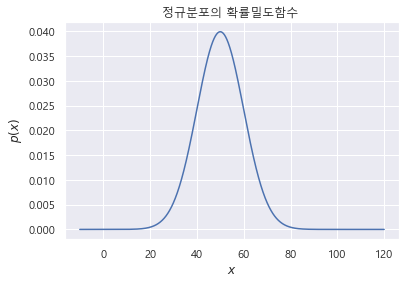

In [35]:
# 정규 분포 시각화 
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 2) 중심극한정리
- 실세계에서 발생하는 현상 중 많은 것들이 정규분포로 모형화
- 여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상
- 모집단에 대한 sampling 횟수가 늘어날 수록 그 표본들의 평균은 모집단의 평균을 중심으로 정규분포를 띄게 되는 현상 

In [36]:
## 동전을 던지는 실험
# 동전을 던졌을때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 10회 수집

bag_of_mean = []

for i in range(10):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

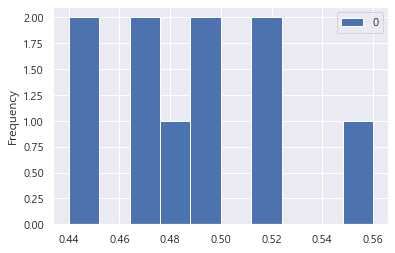

In [37]:
pd.DataFrame(bag_of_mean).plot.hist()

In [38]:
# 동전을 던졌을때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 100회 수집

bag_of_mean = []

for i in range(100):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

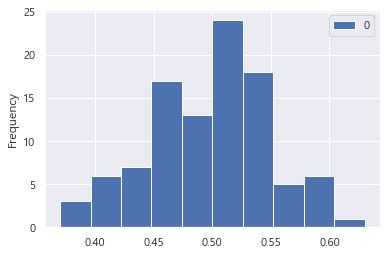

In [39]:
pd.DataFrame(bag_of_mean).plot.hist()

In [40]:
# 동전을 던졌을때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 500회 수집
bag_of_mean = []
for i in range(500):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

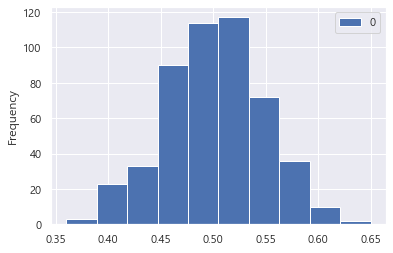

In [41]:
pd.DataFrame(bag_of_mean).plot.hist()

In [42]:
# 동전을 던졌을때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 1000회 수집

bag_of_mean = []

for i in range(1000):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)


<AxesSubplot:ylabel='Frequency'>

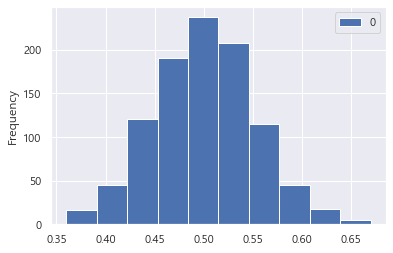

In [43]:
pd.DataFrame(bag_of_mean).plot.hist()

#### QQplot :정규성 검정 
- 수집 데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프
- 집단이 정규성을 따른다면 직선으로 표현 

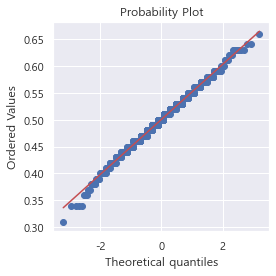

In [33]:
## 위 동전실험 사례에 샘플 1000개는 정규성을 따른다고 판단 

fig, ax = plt.subplots(figsize=(4, 4))

# norm_sample = stats.norm.rvs(size=100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

### 3) t-분포
- 모분산(표준편차)이 알려져 있지 않고, 표본이 충분하지 못한 경우(일반적으로 𝑛<30이면)는
- 정규분포보다 예측범위가 넓은 t분포를 사용
 

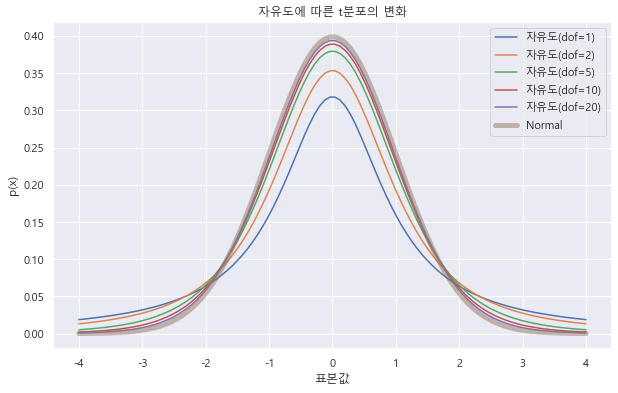

In [44]:
## 자유도에 따른 t 분포 확인 

t_data = np.linspace(-4, 4, 100)

# 플롯 사이즈 지정
plt.figure(figsize=(10, 6))          

for dof in [1, 2, 5, 10, 20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label=("자유도(dof=%d)" % dof))
    
plt.plot(t_data, stats.norm().pdf(t_data), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

## 2. 표본분산의 분포 
- 모집단이 1개인 경우 카이제곱분포로 통계량을 산출
- 모집단이 2개인 경우 F분포로 통계량을 산출, 두 집단의 산포를 비교하는데 이용

### 1) 카이제곱 분포
####  stats.chi2(dof) 

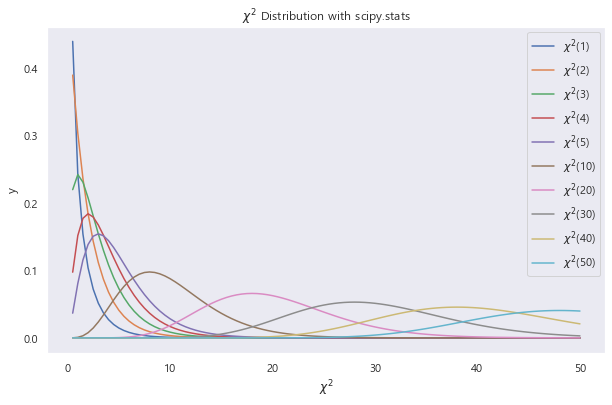

In [45]:
# 카이제곱 분포 표현 
from scipy.stats import chi2

# 라인스페이스 x축 설정 
Chi_X = np.linspace(0.5, 50, 100)

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정

# 자유도에 따른 카이제곱 분포 
for dof in [1,2,3,4,5,10,20,30,40,50] :  
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')
    

plt.xlabel(r'$\chi^2$')              # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')     # 타이틀 표시
plt.legend()                         # 범례 표시
plt.show()                           # 플롯 

## 2) F분포 
- 카이제곱분포와 마찬가지로 분산을 다루는 분포이며, 카이제곱분포 2개의 비율확률 분포
- 두 집단의 산포를 비교하는데 이용
#### stats.f() : F분포 

In [46]:
f_data = np.linspace(0.05, 3, 1000)

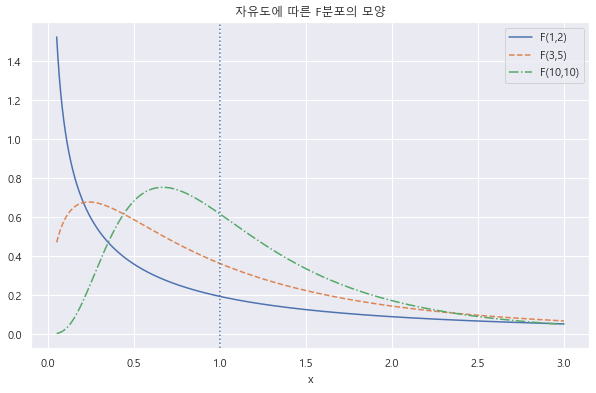

In [47]:
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(f_data, stats.f(1, 2).pdf(f_data), ls="-", label="F(1,2)")
plt.plot(f_data, stats.f(3, 5).pdf(f_data), ls="--", label="F(3,5)")
plt.plot(f_data, stats.f(10, 10).pdf(f_data), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()